In [102]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import tensorflow
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [103]:
#the output of plotting commans is displayed inline
%matplotlib inline   

In [104]:
df=pd.read_csv(r"C:\Users\Shivanshu\Downloads\dataset\NIFTY50_all.csv")     #import and load  the dataset

In [105]:
df.head()       #View the data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [106]:
df.shape   #get the shape of data

(235192, 15)

In [107]:
df.columns   #get the columns names

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [108]:
df.info()      #get the non-null values in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [109]:
df.describe()    #statictics behind the numerical variables

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


Text(0, 0.5, 'Count')

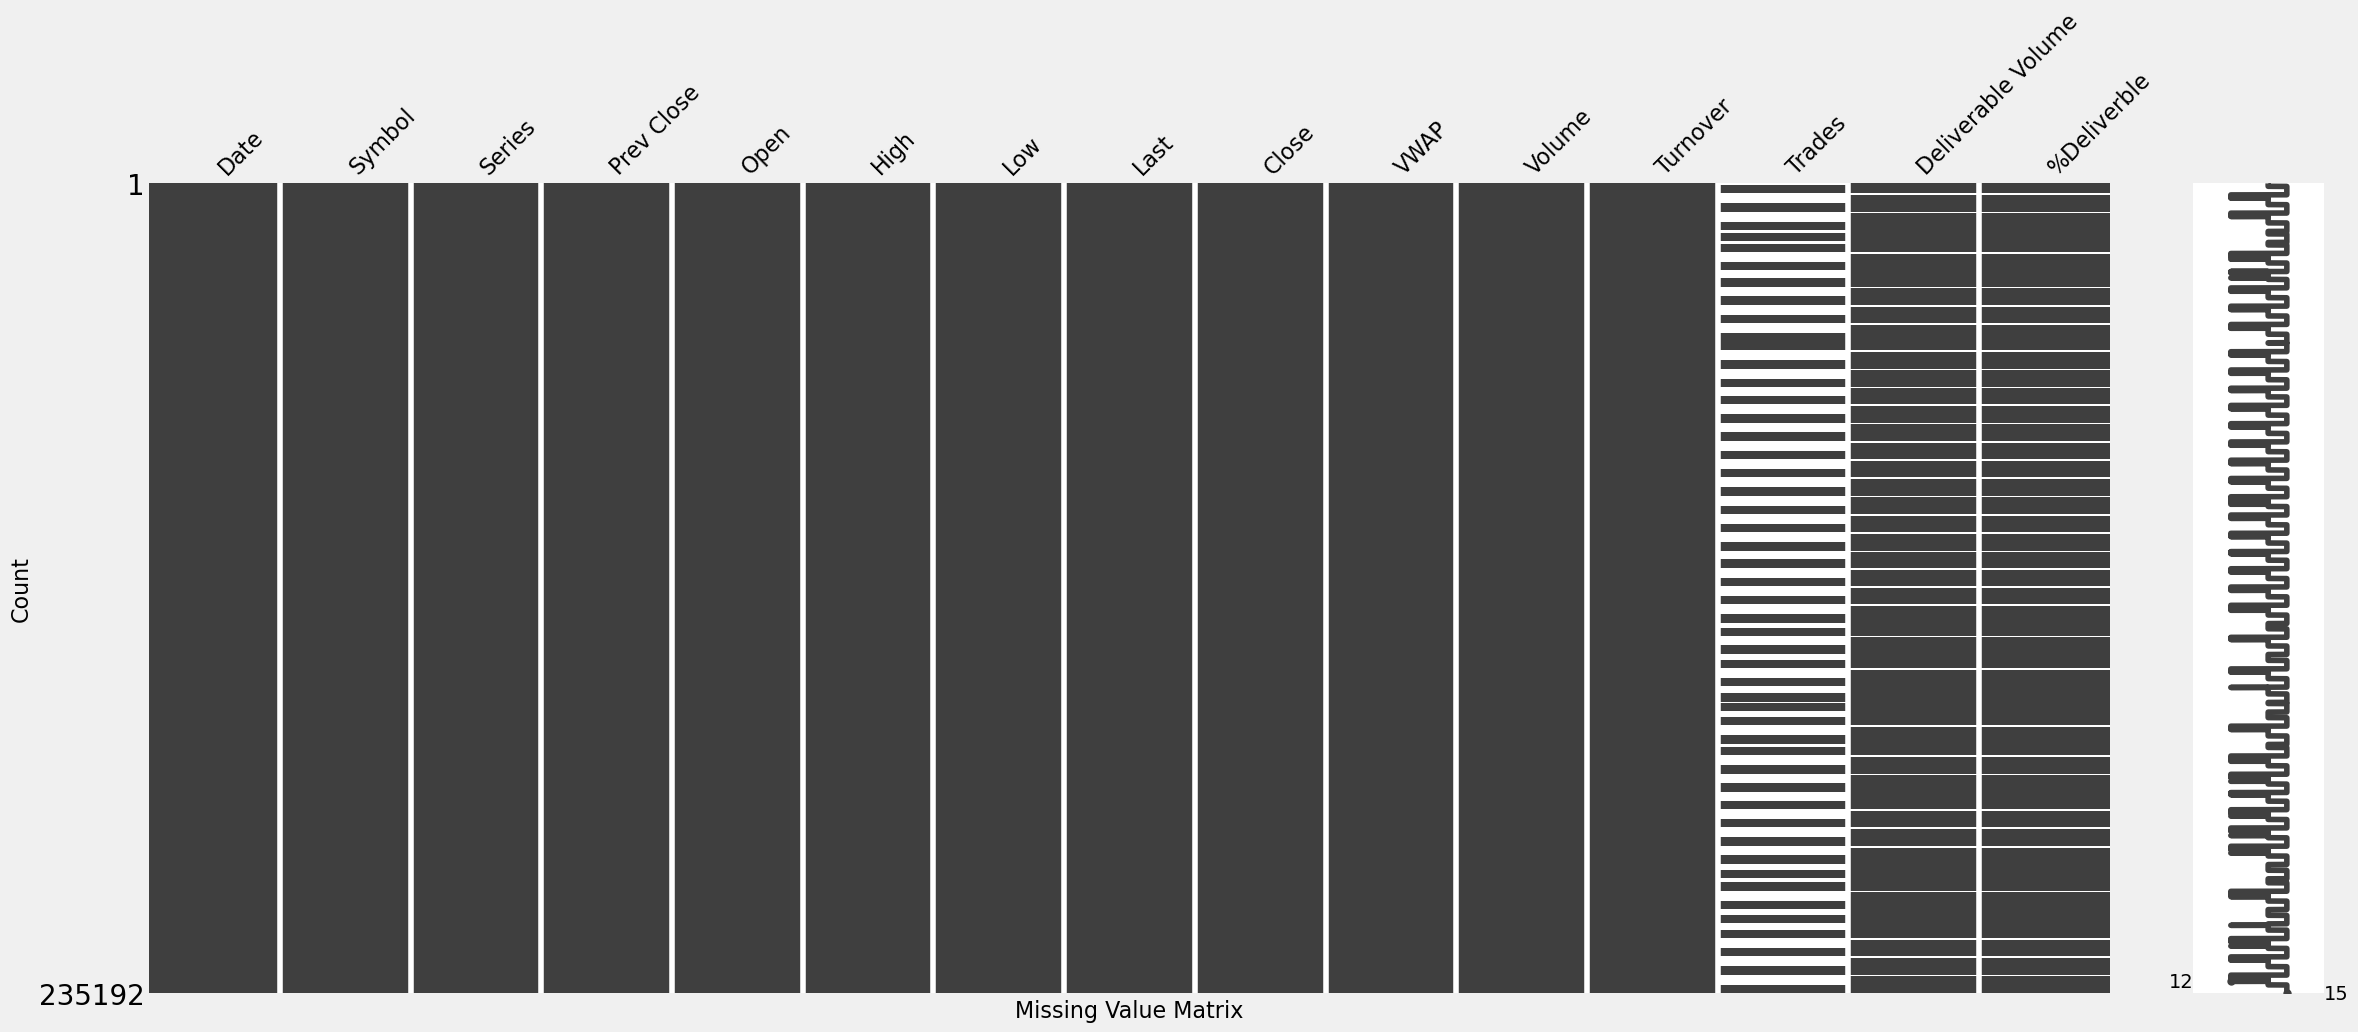

In [110]:
#visualizing missing data
msno.matrix(df)
plt.xlabel("Missing Value Matrix",fontsize=16)
plt.ylabel("Count",fontsize=16)

In [121]:
#take any one year stock data and create new df for future analysis

stockprice_one_year=df[(df["Date"]>'2011-03-31')&(df["Date"]<'2012-04-01')]
stockprice_one_year


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
826,2011-04-01,MUNDRAPORT,EQ,136.65,138.00,142.25,137.50,141.00,141.15,140.36,1716486,2.409280e+13,NaN,965478.0,0.5625
827,2011-04-04,MUNDRAPORT,EQ,141.15,142.35,149.10,141.50,148.95,148.20,146.00,1125553,1.643326e+13,NaN,501391.0,0.4455
828,2011-04-05,MUNDRAPORT,EQ,148.20,148.50,158.00,148.05,157.00,156.85,154.12,1712167,2.638708e+13,NaN,475131.0,0.2775
829,2011-04-06,MUNDRAPORT,EQ,156.85,158.00,158.40,152.25,154.15,153.65,155.05,934007,1.448215e+13,NaN,424174.0,0.4541
830,2011-04-07,MUNDRAPORT,EQ,153.65,154.75,157.00,152.70,155.75,155.75,154.85,1042870,1.614923e+13,NaN,663880.0,0.6366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232940,2012-03-26,ZEEL,EQ,127.55,126.00,128.00,123.70,124.70,124.70,125.96,378611,4.768950e+12,4026.0,123677.0,0.3267
232941,2012-03-27,ZEEL,EQ,124.70,127.00,131.20,124.45,126.90,126.85,127.76,1338521,1.710156e+13,9341.0,713532.0,0.5331
232942,2012-03-28,ZEEL,EQ,126.85,126.80,128.70,122.20,123.35,122.95,123.55,1525642,1.884937e+13,13691.0,853547.0,0.5595
232943,2012-03-29,ZEEL,EQ,122.95,121.00,130.00,120.95,128.25,127.85,126.76,1244360,1.577376e+13,9624.0,725301.0,0.5829


In [126]:
stockprice_one_year.describe()   ##statictics behind the numerical variables of one year

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,12201.000000,1.220100e+04,1.220100e+04,10241.000000,1.220100e+04,12201.000000
mean,914.613069,914.665560,928.100348,901.146623,914.215109,914.324203,914.746788,2.050134e+06,1.085968e+14,35124.495362,1.033392e+06,0.519038
std,898.655344,898.902458,910.625925,887.282958,898.691166,898.760310,899.021356,3.209762e+06,1.746076e+14,36169.281203,2.024772e+06,0.175292
min,94.350000,94.850000,95.350000,93.500000,94.100000,94.350000,94.540000,6.800000e+01,1.409860e+10,16.000000,1.700000e+01,0.046700
25%,308.300000,308.950000,312.900000,303.600000,308.100000,308.200000,308.430000,3.043810e+05,1.727995e+13,8931.000000,1.340010e+05,0.398400
50%,549.500000,548.000000,561.900000,540.000000,549.000000,549.450000,551.830000,1.111377e+06,5.182419e+13,23404.000000,5.276140e+05,0.528200
75%,1228.250000,1228.000000,1246.000000,1210.950000,1227.950000,1226.850000,1228.040000,2.621078e+06,1.467380e+14,50103.000000,1.263258e+06,0.643200
max,4714.600000,4730.000000,4754.950000,4559.900000,4734.000000,4714.600000,4647.540000,1.584141e+08,1.043773e+16,394192.000000,1.483131e+08,0.999200


<Axes: >

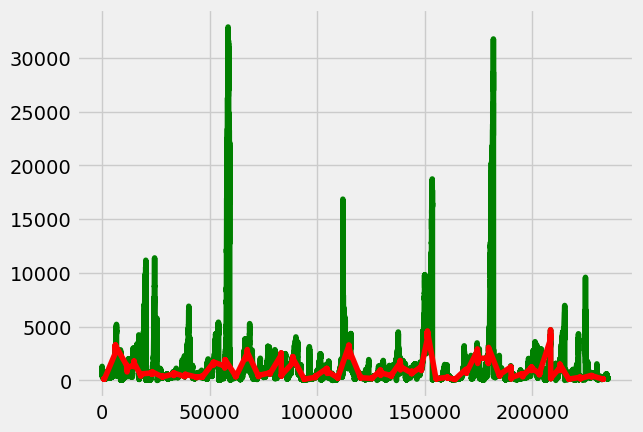

In [127]:
#lets compare stockprice of one year vs df
# compare for prev close
pl=df['Prev Close'].plot(c='green')
stockprice_one_year['Prev Close'].plot(ax=pl,c='red')

<Axes: >

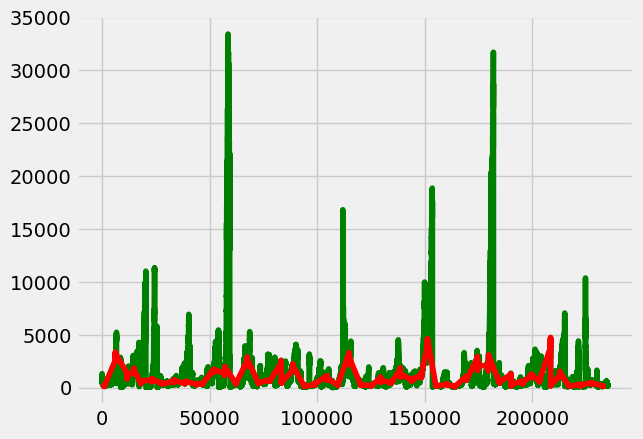

In [128]:
# compare for open
pl=df['Open'].plot(c='green')
stockprice_one_year['Open'].plot(ax=pl,c='red')

<Axes: >

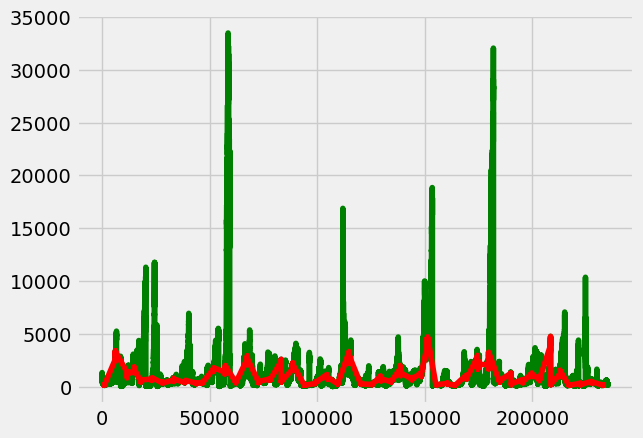

In [129]:
# compare for High
pl=df['High'].plot(c='green')
stockprice_one_year['High'].plot(ax=pl,c='red')

<Axes: >

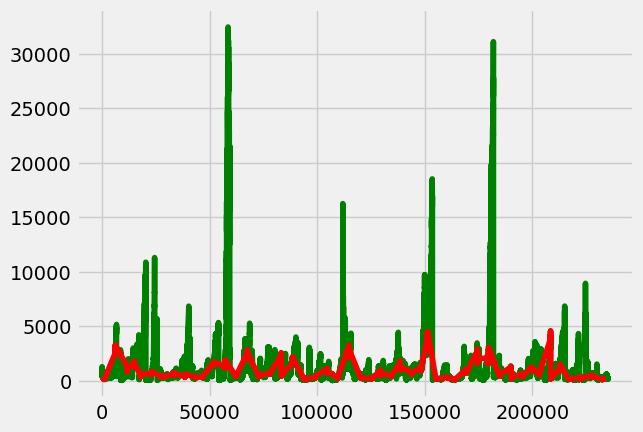

In [130]:
# compare for Low
pl=df['Low'].plot(c='green')
stockprice_one_year['Low'].plot(ax=pl,c='red')

<Axes: >

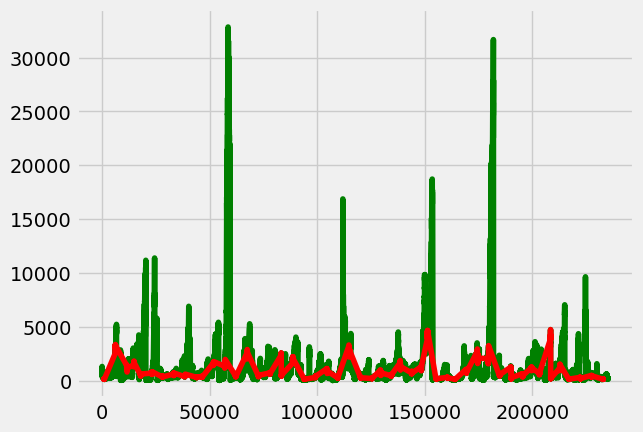

In [131]:
# compare for Last
pl=df['Last'].plot(c='green')
stockprice_one_year['Last'].plot(ax=pl,c='red')

<Axes: >

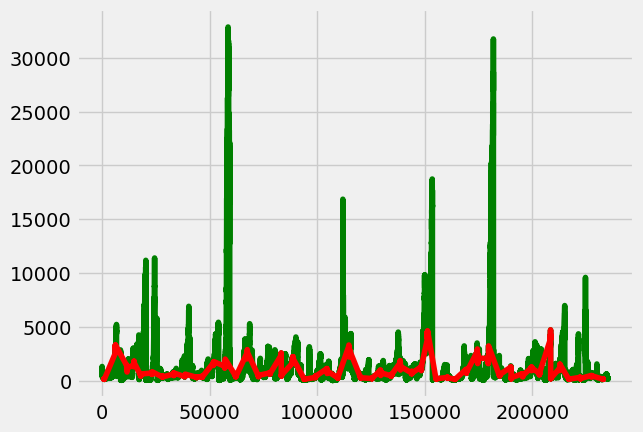

In [132]:
# compare for close
pl=df['Close'].plot(c='green')
stockprice_one_year['Close'].plot(ax=pl,c='red')

<Axes: >

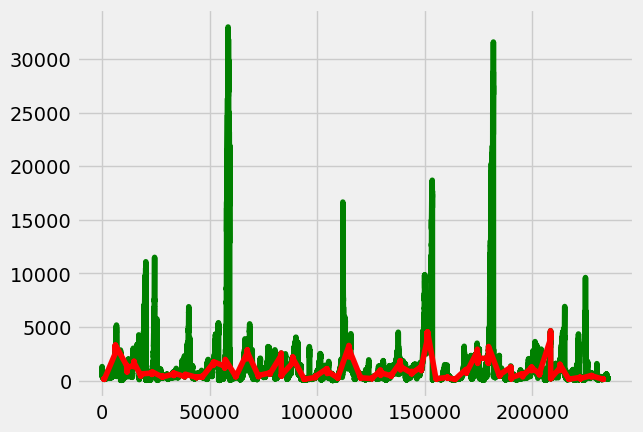

In [133]:
# compare for VWAP
pl=df['VWAP'].plot(c='green')
stockprice_one_year['VWAP'].plot(ax=pl,c='red')

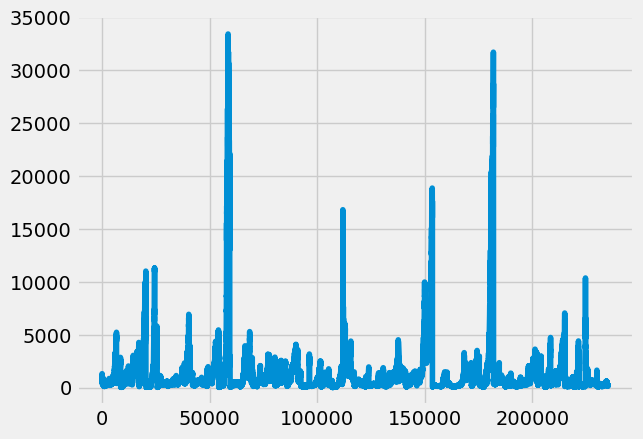

In [134]:
#check for matplotlib plotting

plt.plot(df['Open'])

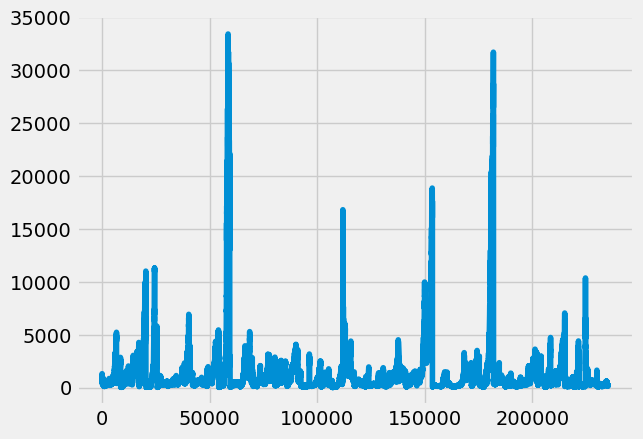

In [135]:

plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

In [136]:
# Exclude non-numeric columns from correlation calculation and plot heatmap
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.999718,0.999616,0.999601,0.999505,0.999518,0.999622,-0.118742,0.052888,-0.149562,-0.132987,-0.009034
Open,0.999718,1.000000,0.999857,0.999863,0.999748,0.999761,0.999867,-0.118779,0.052704,-0.149840,-0.133025,-0.009078
High,0.999616,0.999857,1.000000,0.999790,0.999881,0.999892,0.999937,-0.118595,0.053697,-0.148860,-0.132979,-0.009962
Low,0.999601,0.999863,0.999790,1.000000,0.999868,0.999878,0.999929,-0.118914,0.052144,-0.150774,-0.133141,-0.008543
Last,0.999505,0.999748,0.999881,0.999868,1.000000,0.999991,0.999950,-0.118713,0.053110,-0.149736,-0.133051,-0.009367
Close,0.999518,0.999761,0.999892,0.999878,0.999991,1.000000,0.999963,-0.118705,0.053106,-0.149751,-0.133042,-0.009362
VWAP,0.999622,0.999867,0.999937,0.999929,0.999950,0.999963,1.000000,-0.118757,0.053013,-0.149787,-0.133096,-0.009425
Volume,-0.118742,-0.118779,-0.118595,-0.118914,-0.118713,-0.118705,-0.118757,1.000000,0.629582,0.703770,0.829507,-0.209112
Turnover,0.052888,0.052704,0.053697,0.052144,0.053110,0.053106,0.053013,0.629582,1.000000,0.840716,0.573714,-0.194729
Trades,-0.149562,-0.149840,-0.148860,-0.150774,-0.149736,-0.149751,-0.149787,0.703770,0.840716,1.000000,0.567846,-0.252629


In [137]:
numeric_df1 = df.select_dtypes(include=['number'])
corr_stock_one_year = numeric_df1.corr()

<Axes: >

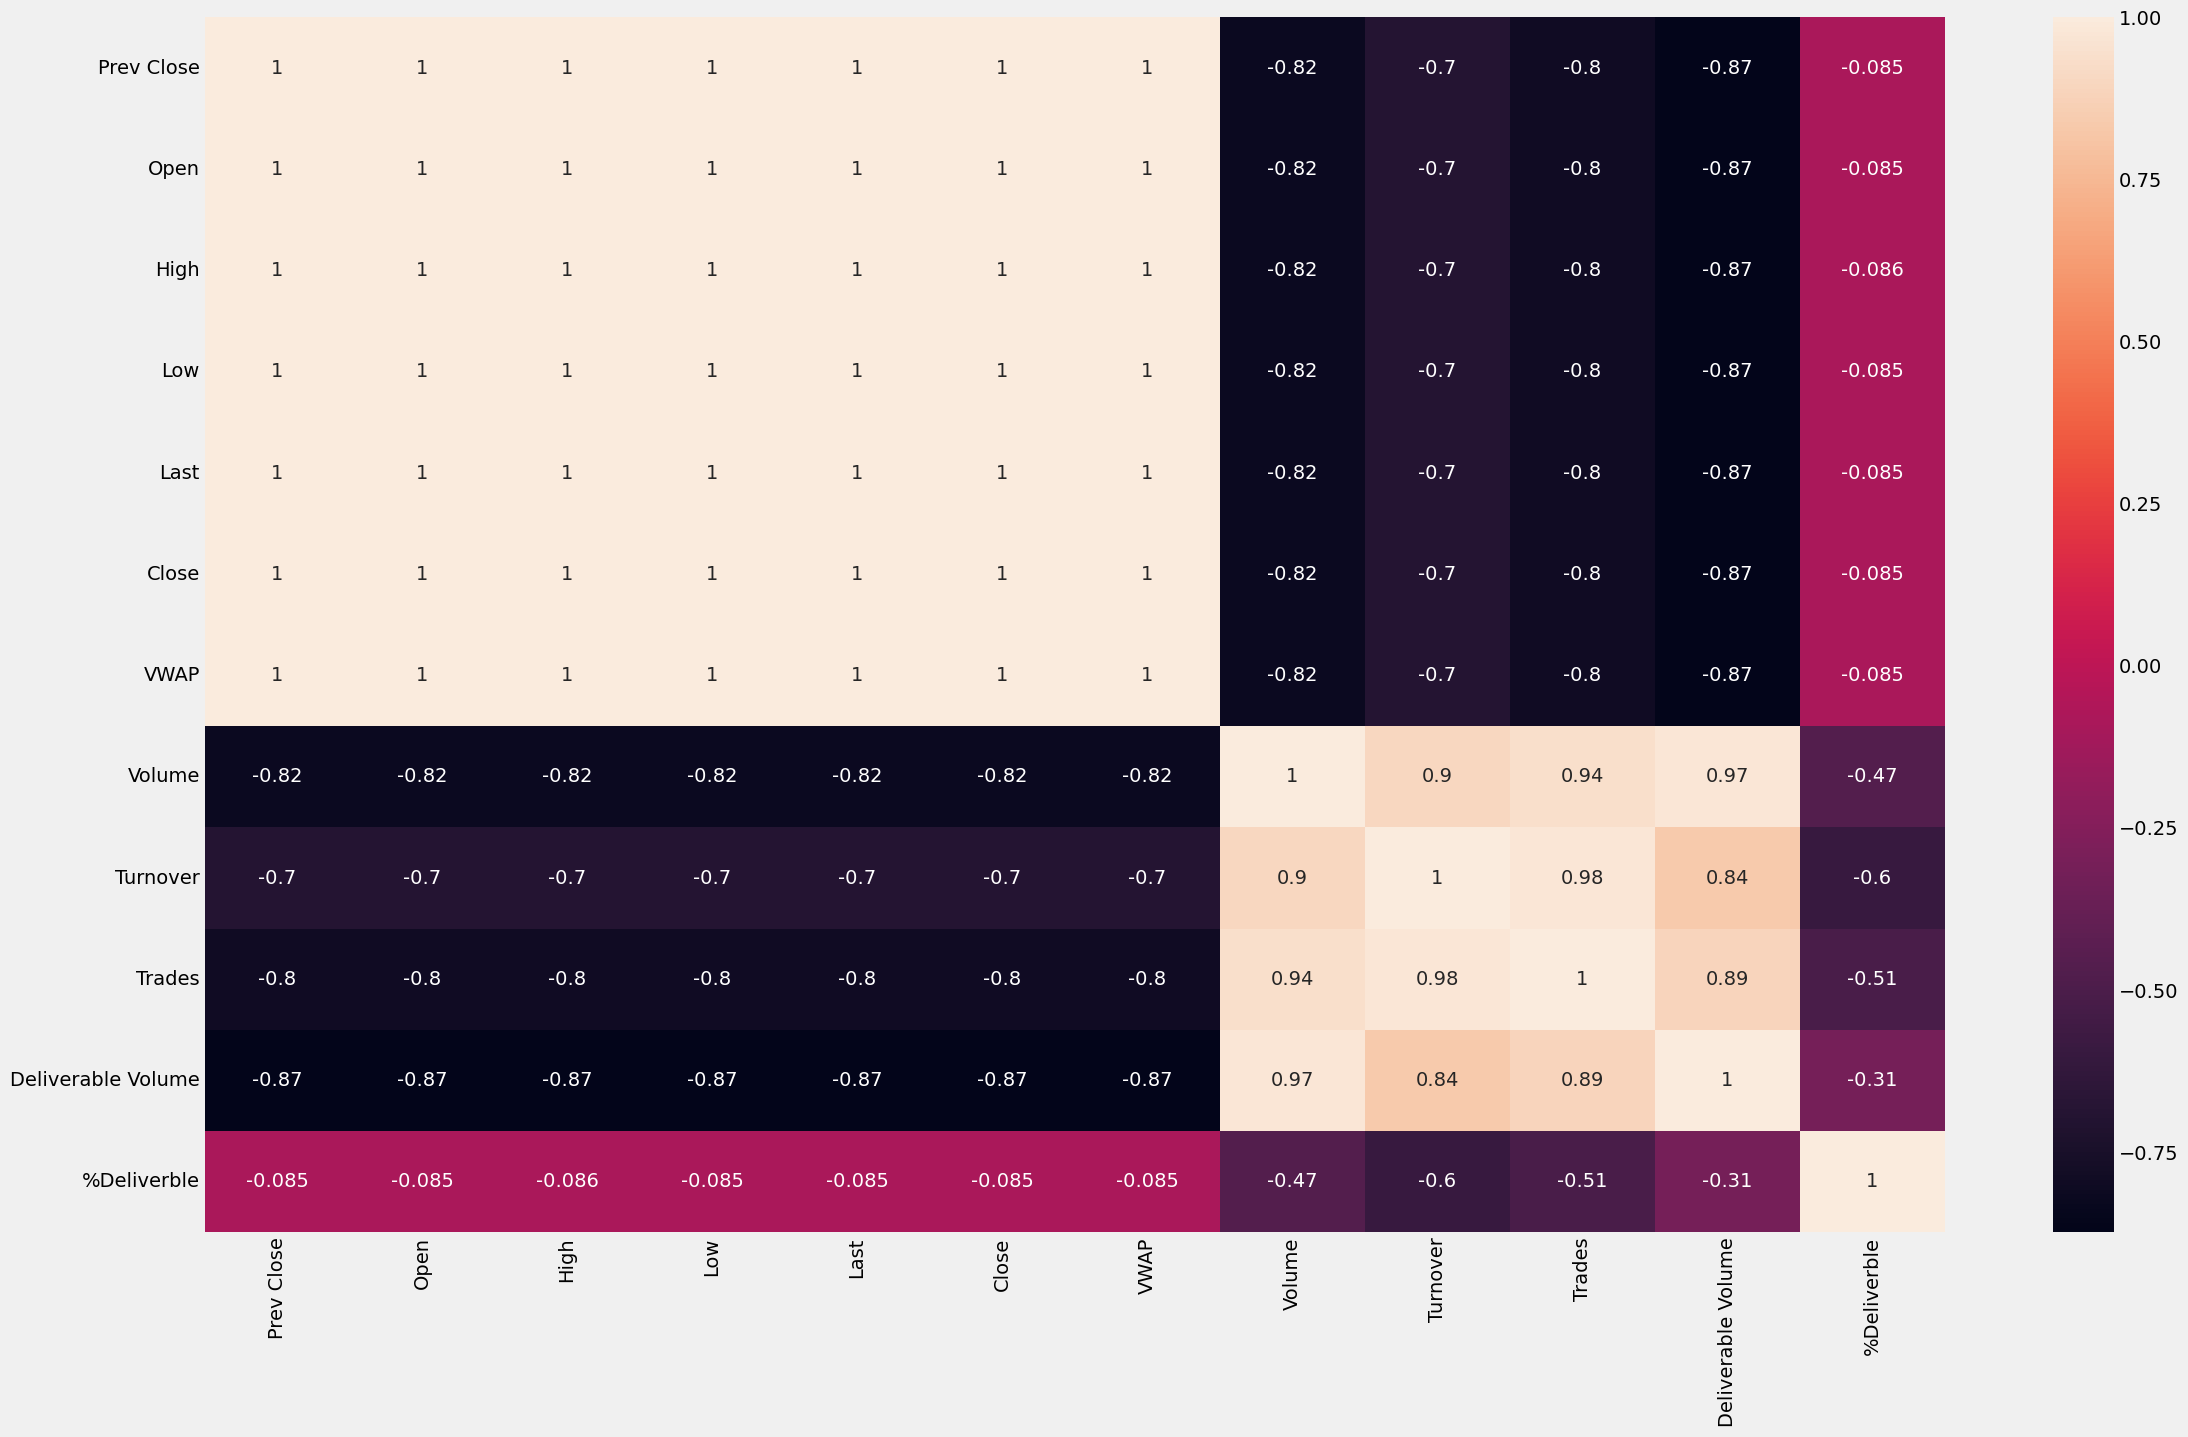

In [138]:
plt.figure(figsize=(25,15))
sns.heatmap(corr_stock_one_year.corr(method='pearson'),annot=True)

<Axes: xlabel='Date'>

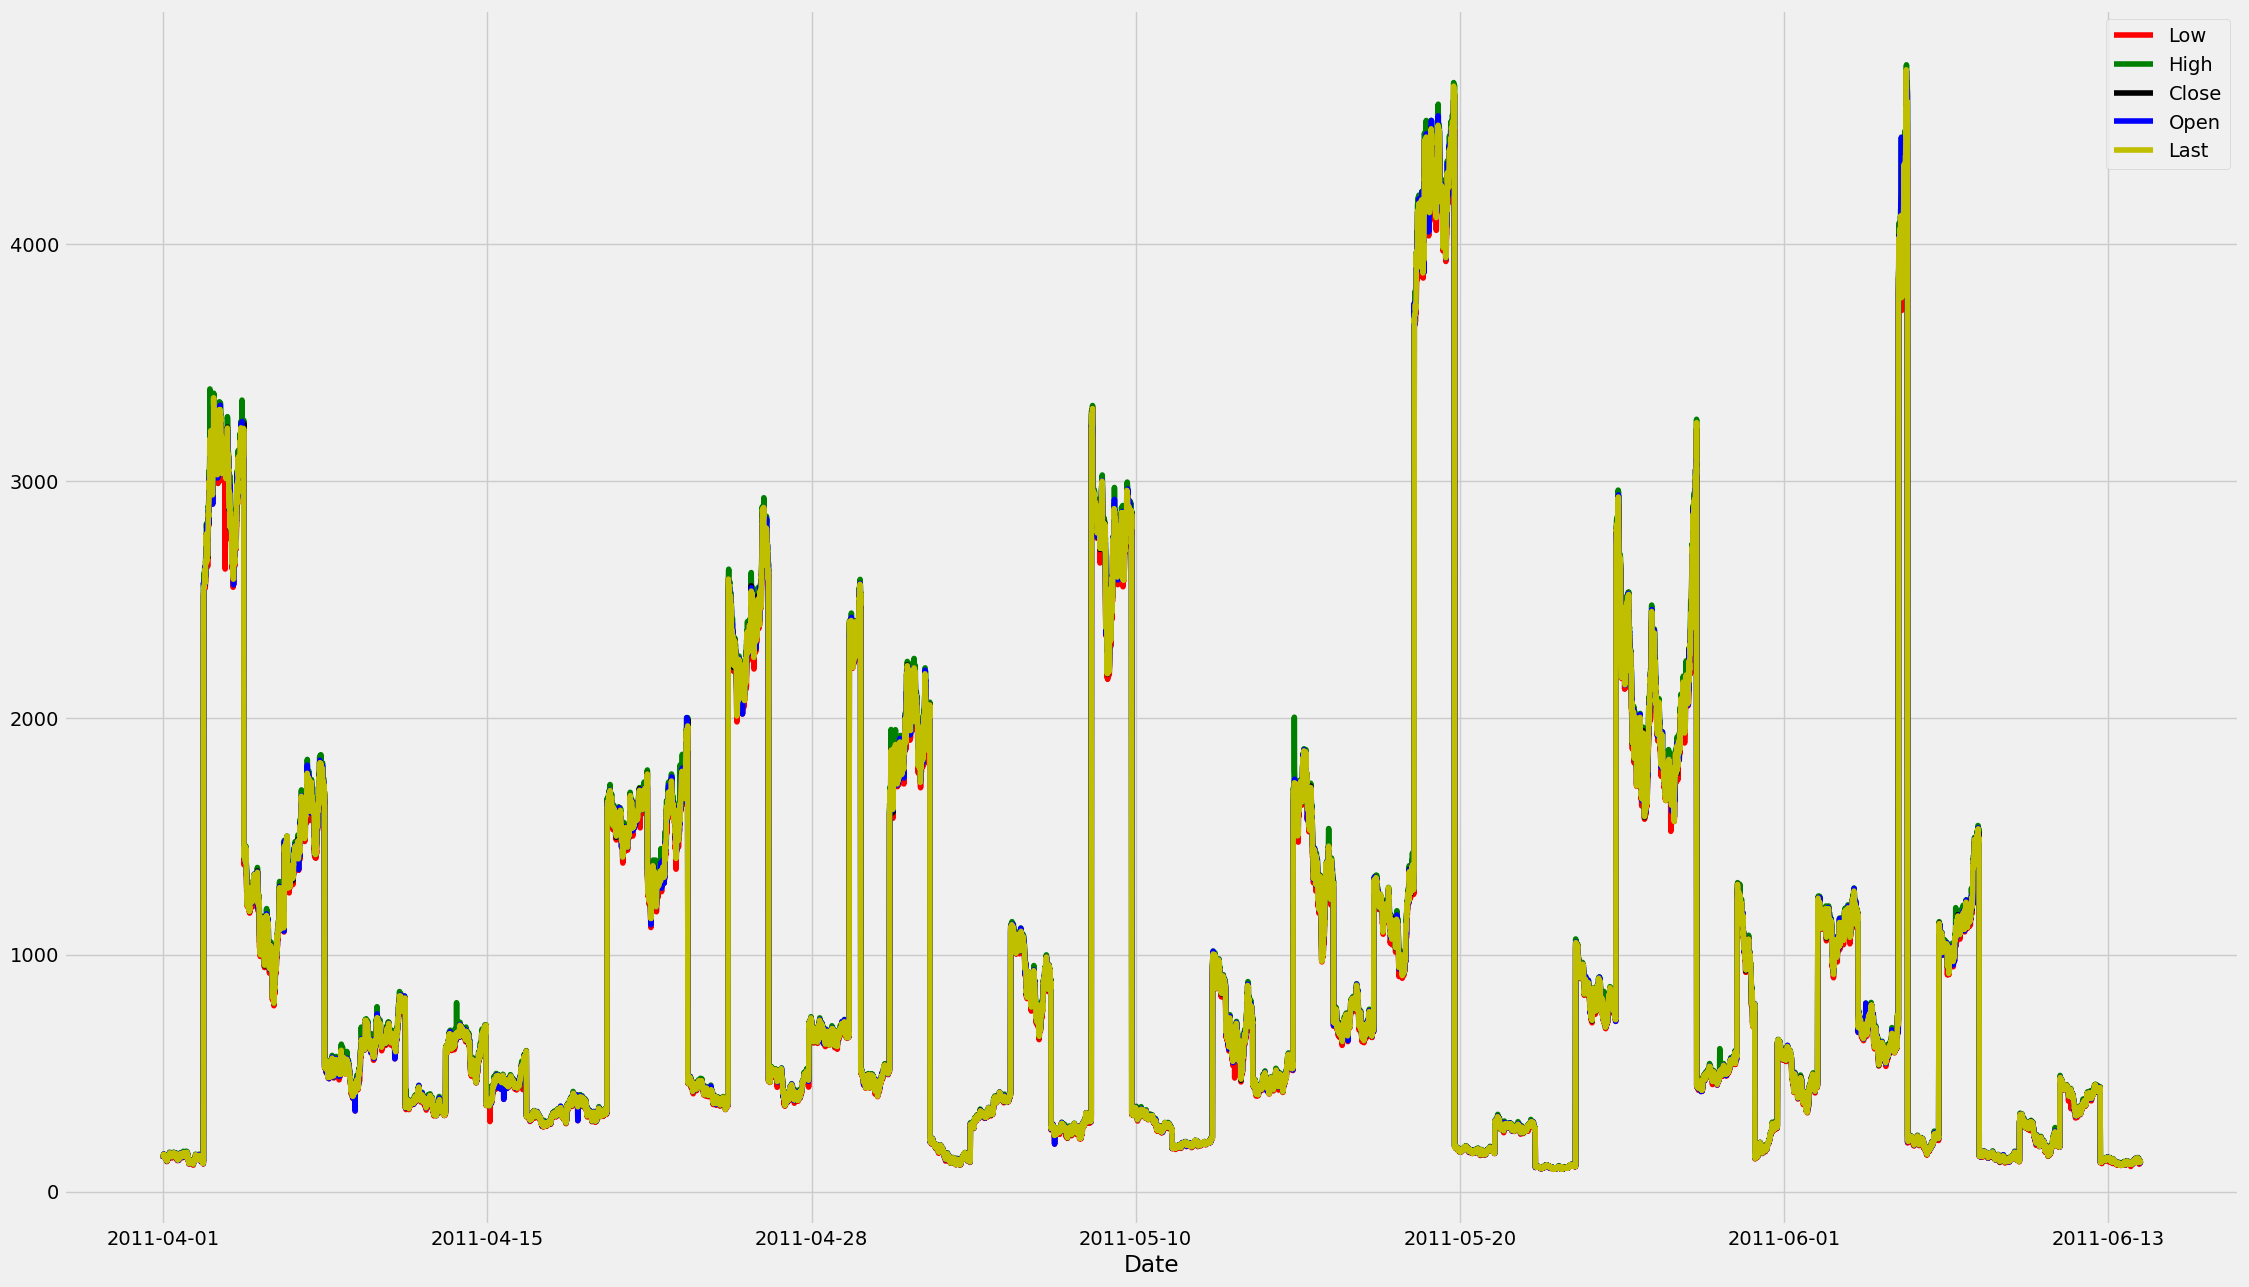

In [139]:
#plot multiple features in a single plot
stockprice_one_year.plot(x="Date",y=["Low","High","Close","Open","Last"],color=["r","g","k","b","y"],figsize=[25,15])

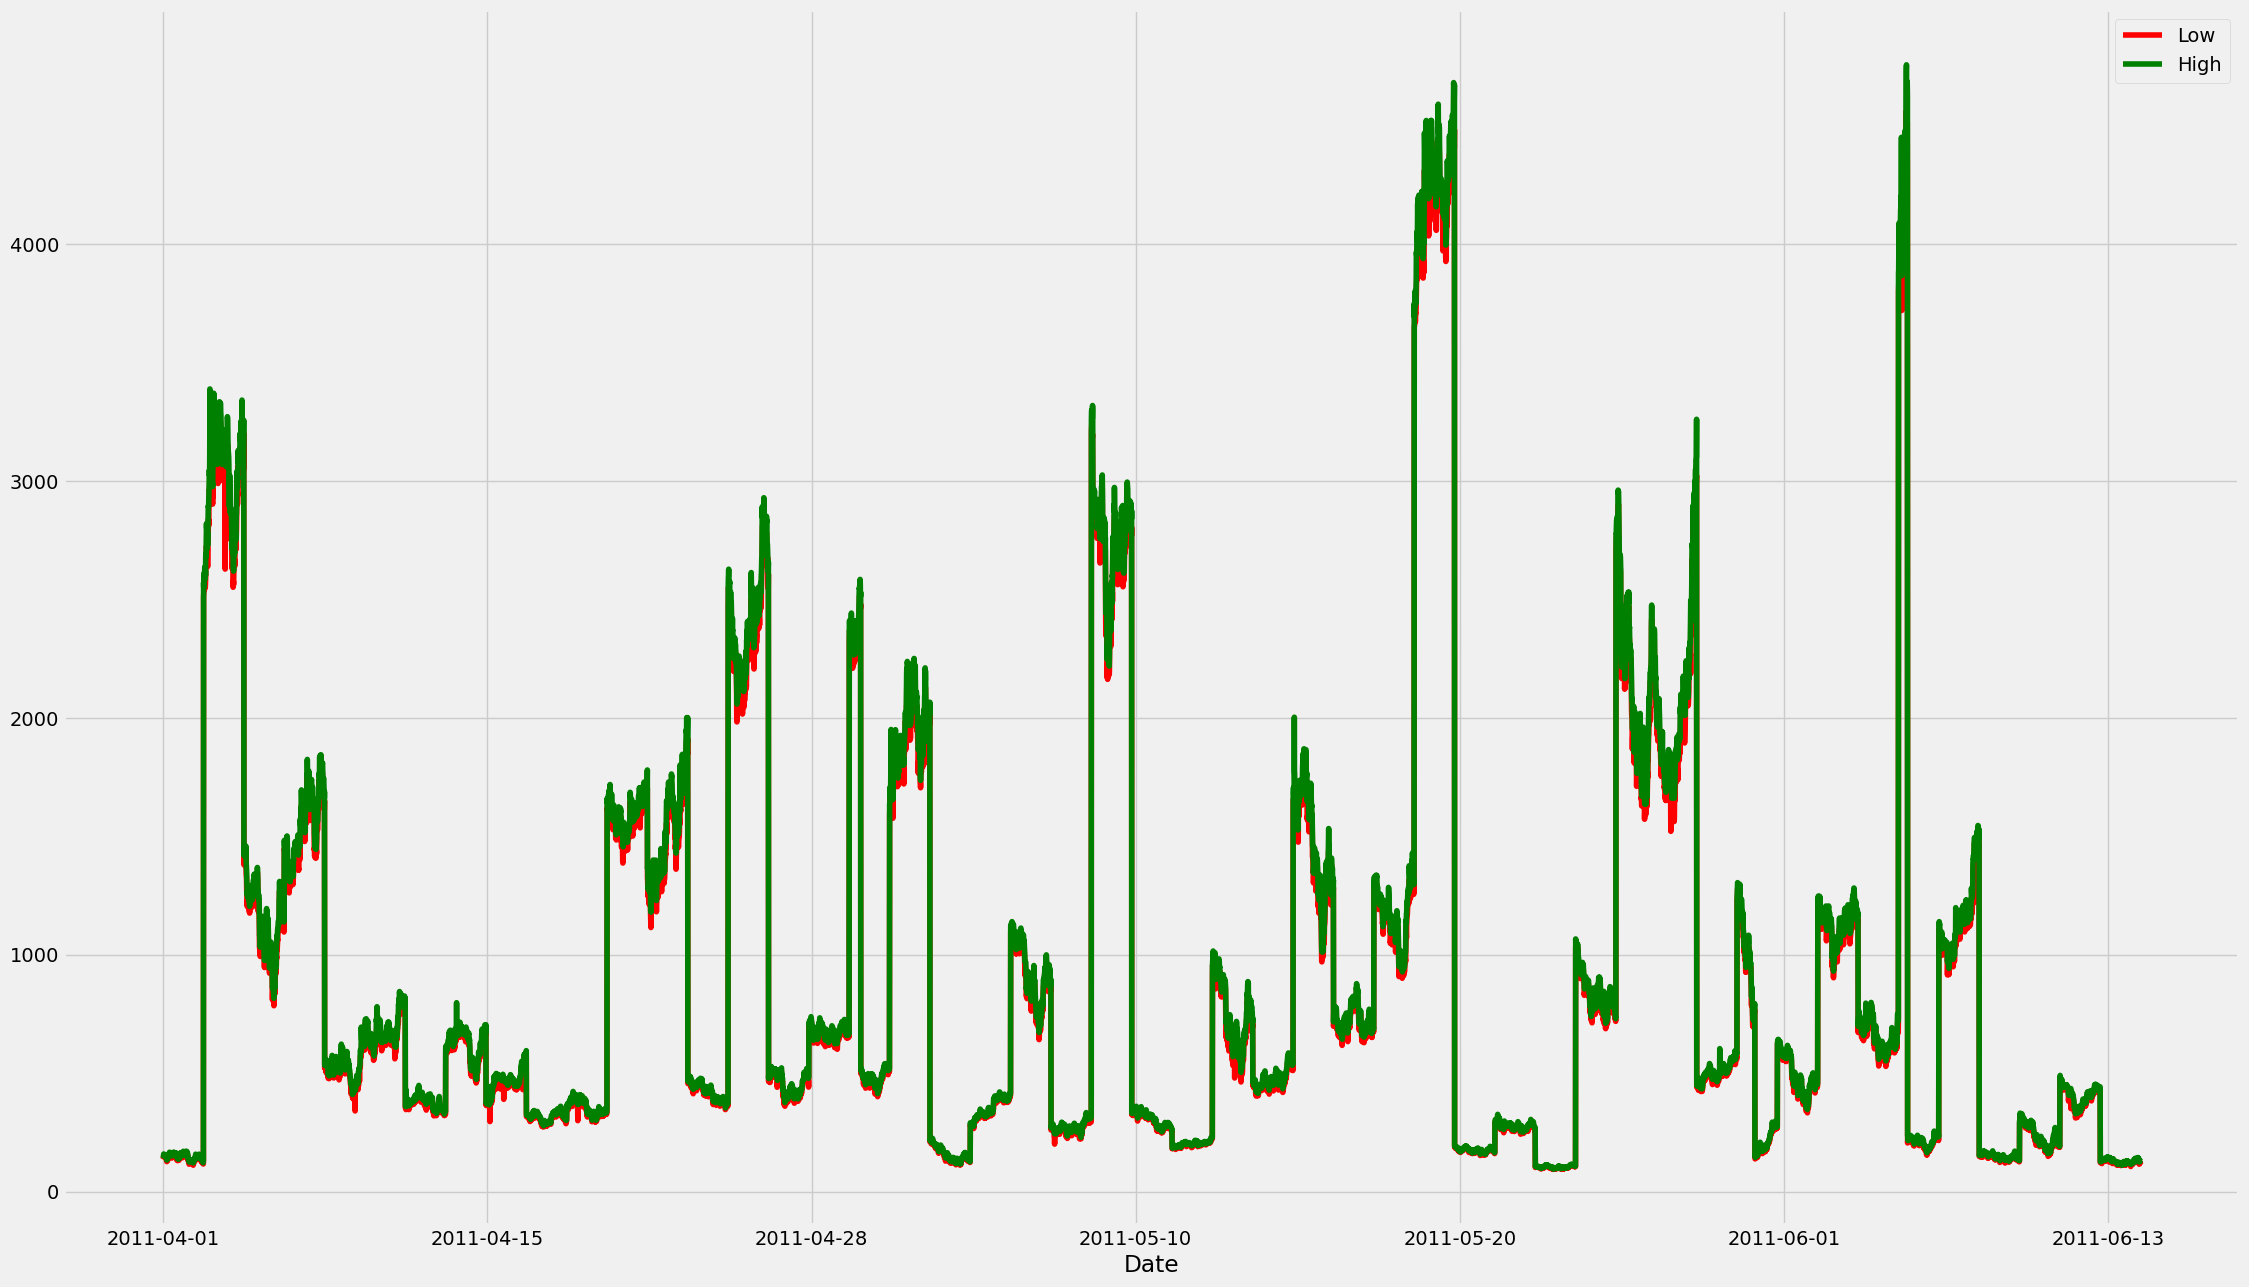

In [140]:
stockprice_one_year.plot(x="Date",y=["Low","High"],color=["r","g"],figsize=[25,15])
plt.show()

In [141]:
#generating new features based on important features
data=df[["Date","Open","High","Low","Volume","VWAP"]]

In [142]:
#setting index as a date
df.set_index("Date",drop=False,inplace=True)

<Axes: xlabel='Date'>

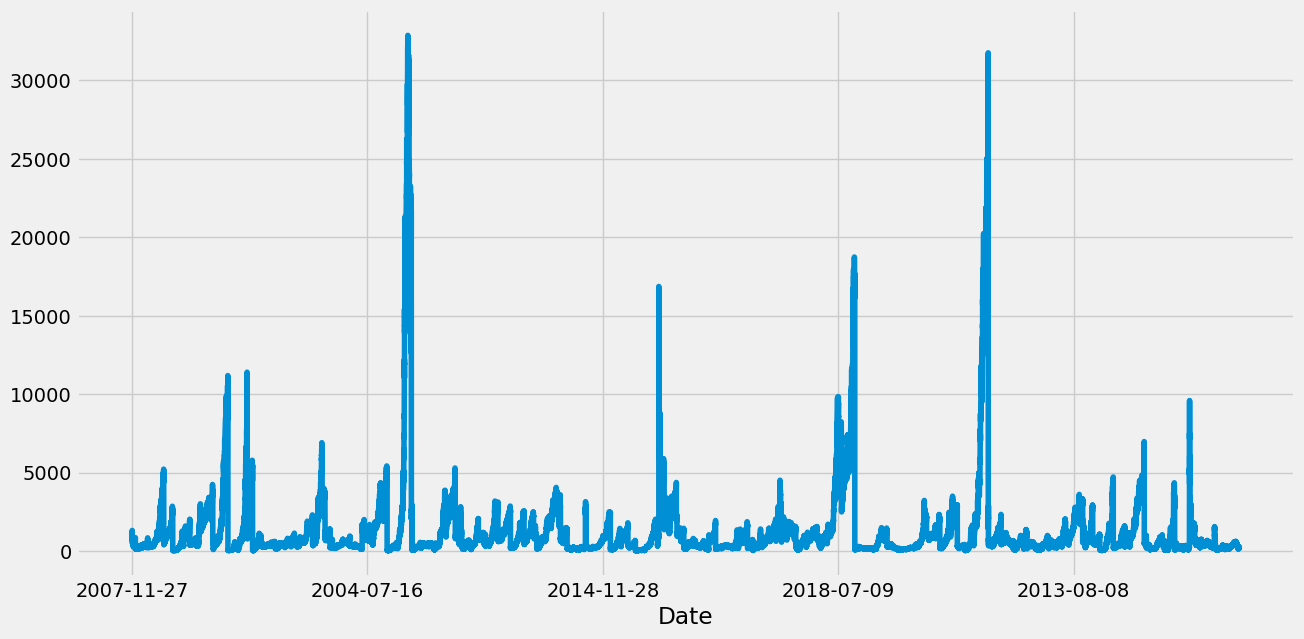

In [143]:
#visual representation of Closing Price
df.Close.plot(figsize=(14,7))

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    235192 non-null  object 
 1   Open    235192 non-null  float64
 2   High    235192 non-null  float64
 3   Low     235192 non-null  float64
 4   Volume  235192 non-null  int64  
 5   VWAP    235192 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ MB


In [145]:
#generating new features lag and Window for features related to Closing Price
df.reset_index(drop=True,inplace=True)
lag_features=["Open","High","Low","VWAP"]
window1=3
window2=7

df_rolled_3d=df[lag_features].rolling(window=window1,min_periods=0)
df_mean_3d=df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d=df[lag_features].rolling(window=window2,min_periods=0)
df_std_7d=df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"]= df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window1}"]= df_std_7d[feature].astype('float32')

In [146]:
df.set_index("Date",drop=False,inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag3,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,VWAP_mean_lag3,VWAP_std_lag3
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,9859619.0,0.3612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,1453278.0,0.3172,770.000000,770.000000,1050.000000,1050.000000,770.000000,770.000000,984.719971,984.719971
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,1069678.0,0.2088,877.000000,877.000000,1020.000000,1020.000000,822.000000,822.000000,963.049988,963.049988
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,1260913.0,0.2735,887.666687,887.666687,984.916687,984.916687,828.333313,828.333313,938.063354,938.063354
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,816123.0,0.2741,927.666687,888.250000,954.250000,978.187500,868.333313,843.750000,919.546692,935.840027


In [147]:
#Extracting datetime features from dataset
df.Date=pd.to_datetime(df.Date,format="%Y-%m-%d")
df["month"]=df.Date.dt.month
df["day"]=df.Date.dt.day
df["day_of_week"]=df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Open_std_lag3,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,VWAP_mean_lag3,VWAP_std_lag3,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,27,1
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,...,770.000000,1050.000000,1050.000000,770.000000,770.000000,984.719971,984.719971,11,28,2
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,...,877.000000,1020.000000,1020.000000,822.000000,822.000000,963.049988,963.049988,11,29,3
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,...,887.666687,984.916687,984.916687,828.333313,828.333313,938.063354,938.063354,11,30,4
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,...,888.250000,954.250000,978.187500,868.333313,843.750000,919.546692,935.840027,12,3,0


In [148]:
#removing unnecessary features
df=df.drop(columns=["Symbol"])
df=df.drop(columns=["Series"])

In [149]:
#Splitting Dataset into Training and Testing Data
df_train=df[df.Date<"2018"]
df_valid=df[df.Date>="2018"]

In [150]:
df_valid.shape

(40327, 24)

In [151]:
df_train.head().T   #print 1st five rows and transpose the dataframe

Date,2007-11-27,2007-11-28,2007-11-29,2007-11-30,2007-12-03
Date,2007-11-27 00:00:00,2007-11-28 00:00:00,2007-11-29 00:00:00,2007-11-30 00:00:00,2007-12-03 00:00:00
Prev Close,440.0,962.9,893.9,884.2,921.55
Open,770.0,984.0,909.0,890.0,939.75
High,1050.0,990.0,914.75,958.0,995.0
Low,770.0,874.0,841.0,890.0,922.0
Last,959.0,885.0,887.0,929.0,980.0
Close,962.9,893.9,884.2,921.55,969.3
VWAP,984.72,941.38,888.09,929.17,965.65
Volume,27294366,4581338,5124121,4609762,2977470
Turnover,2687719053785000.0,431276530165000.0,455065846265000.0,428325662830000.0,287519974300000.0


In [152]:
#Scaling Data and Transforming  it for Training

y_train=df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn=df_train['Close'].to_numpy().reshape(-1,1)

In [153]:
y_valid=df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_validn=df_train['Close'].to_numpy().reshape(-1,1)

In [154]:
X_train=df_train.drop(columns=["Close"])
X_train1=X_train.drop("Date",axis=1)
X_train1=(X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat([X_train, X_train["Date"]], axis=1)

In [155]:
X_valid=df_train.drop(columns=["Close"])
X_valid1=X_valid.drop("Date",axis=1)
X_valid1=(X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat([X_valid, X_valid["Date"]], axis=1)

In [156]:
#drop the date column and covert rest columns to numpy array
X_train3=X_train2.drop(columns=["Date"]).to_numpy()
X_valid3=X_valid2.drop(columns=["Date"]).to_numpy()



In [157]:
y_train1=y_train1.reshape(-1,1)
y_valid1=y_valid1.reshape(-1,1)

In [158]:
#Model Training 
#XGBoost Tuning

xgb=XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)

[0]	validation_0-rmse:1048.92104	validation_1-rmse:1048.92104
[1]	validation_0-rmse:1049.42276	validation_1-rmse:1049.42276
[2]	validation_0-rmse:1050.25289	validation_1-rmse:1050.25289
[3]	validation_0-rmse:1051.39764	validation_1-rmse:1051.39764
[4]	validation_0-rmse:1052.85014	validation_1-rmse:1052.85014
[5]	validation_0-rmse:1054.59946	validation_1-rmse:1054.59946
[6]	validation_0-rmse:1056.63423	validation_1-rmse:1056.63423
[7]	validation_0-rmse:1058.94429	validation_1-rmse:1058.94429
[8]	validation_0-rmse:1061.51343	validation_1-rmse:1061.51343
[9]	validation_0-rmse:1064.34025	validation_1-rmse:1064.34025
[10]	validation_0-rmse:1067.41285	validation_1-rmse:1067.41285
[11]	validation_0-rmse:1070.71821	validation_1-rmse:1070.71821
[12]	validation_0-rmse:1074.24006	validation_1-rmse:1074.24006
[13]	validation_0-rmse:1077.98518	validation_1-rmse:1077.98518
[14]	validation_0-rmse:1081.93478	validation_1-rmse:1081.93478
[15]	validation_0-rmse:1086.07170	validation_1-rmse:1086.07170
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1200x800 with 0 Axes>

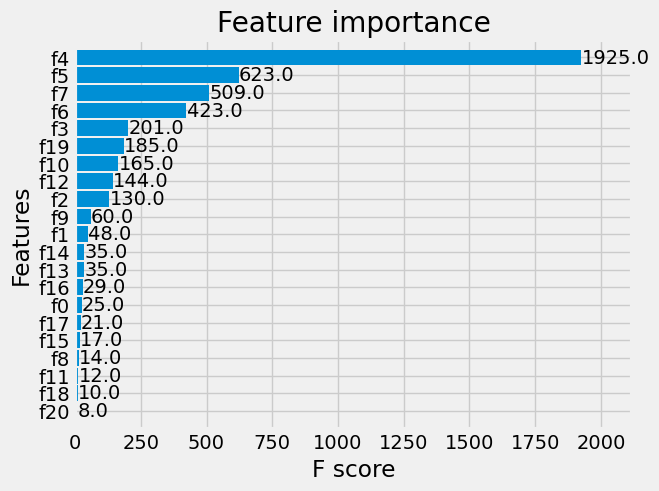

In [159]:
plt.figure(figsize=(12,8))
feature_importance=plot_importance(xgb,height=0.9)
feature_importance

In [160]:
#Plotting Results of the Model

predicted_results_v=xgb.predict(X_valid3)
predicted_results_t=xgb.predict(X_train3)
predicted_results_v=predicted_results_v.reshape(-1,1)
predicted_results_t=predicted_results_t.reshape(-1,1)
predicted_results_v=scaler1.inverse_transform(predicted_results_v)
predicted_results_t=scaler.inverse_transform(predicted_results_v)

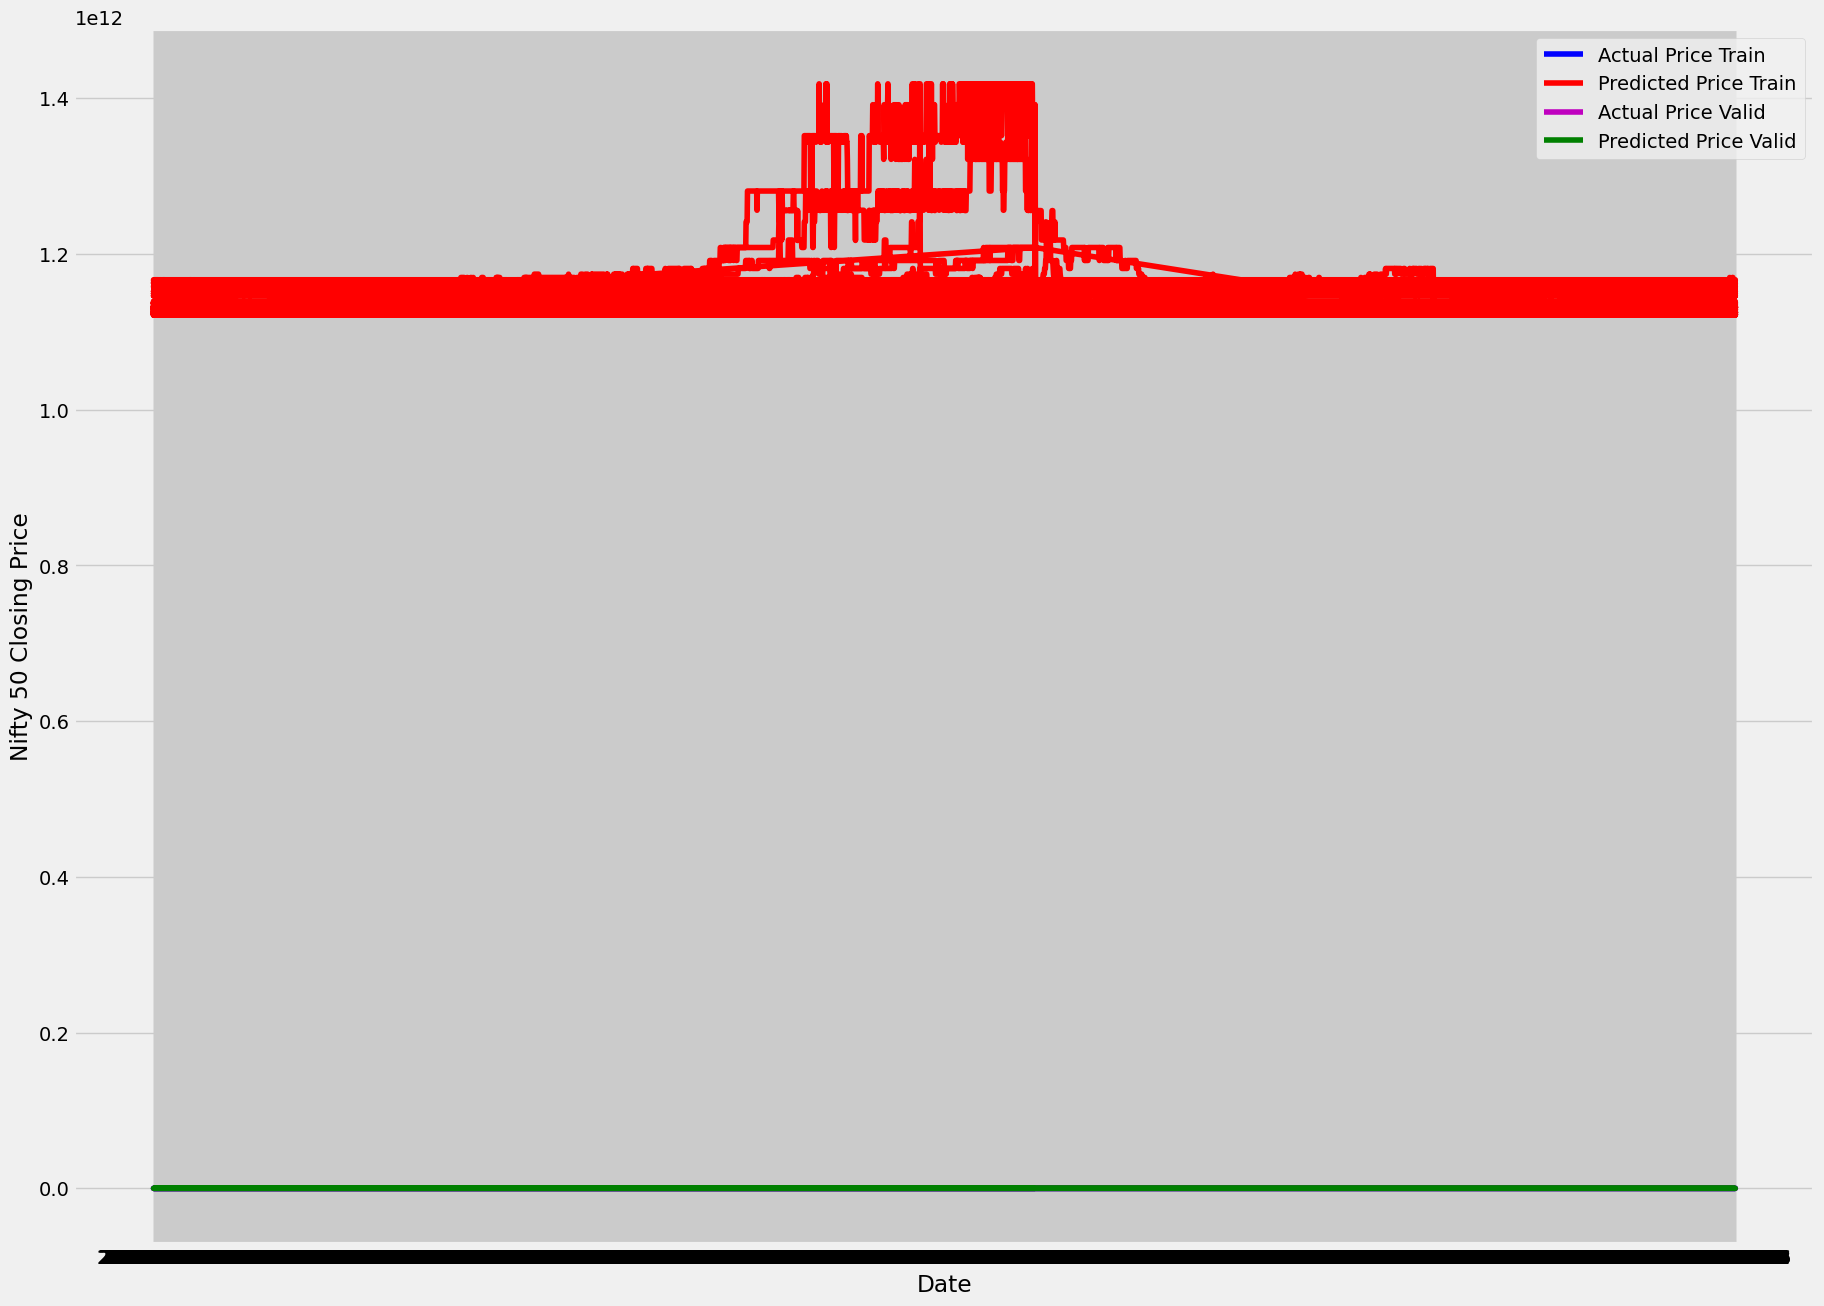

In [161]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="Actual Price Train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="Predicted Price Train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="Actual Price Valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="Predicted Price Valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()



In [162]:
#Training Model Again
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
       eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
       early_stopping_rounds=100,
       verbose=True)

[0]	validation_0-rmse:0.05831	validation_1-rmse:0.05831
[1]	validation_0-rmse:0.05775	validation_1-rmse:0.05775
[2]	validation_0-rmse:0.05719	validation_1-rmse:0.05719
[3]	validation_0-rmse:0.05663	validation_1-rmse:0.05663
[4]	validation_0-rmse:0.05608	validation_1-rmse:0.05608
[5]	validation_0-rmse:0.05554	validation_1-rmse:0.05554
[6]	validation_0-rmse:0.05500	validation_1-rmse:0.05500
[7]	validation_0-rmse:0.05447	validation_1-rmse:0.05447
[8]	validation_0-rmse:0.05394	validation_1-rmse:0.05394
[9]	validation_0-rmse:0.05342	validation_1-rmse:0.05342
[10]	validation_0-rmse:0.05291	validation_1-rmse:0.05291
[11]	validation_0-rmse:0.05240	validation_1-rmse:0.05240
[12]	validation_0-rmse:0.05189	validation_1-rmse:0.05189
[13]	validation_0-rmse:0.05139	validation_1-rmse:0.05139
[14]	validation_0-rmse:0.05089	validation_1-rmse:0.05089
[15]	validation_0-rmse:0.05040	validation_1-rmse:0.05040
[16]	validation_0-rmse:0.04991	validation_1-rmse:0.04991
[17]	validation_0-rmse:0.04943	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0099, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [163]:
#again plot the results
predicted_results_v=xgb.predict(X_valid3)
predicted_results_t=xgb.predict(X_train3)
predicted_results_v=predicted_results_v.reshape(-1,1)
predicted_results_t=predicted_results_t.reshape(-1,1)
predicted_results_v=scaler1.inverse_transform(predicted_results_v)
predicted_results_t=scaler.inverse_transform(predicted_results_t)

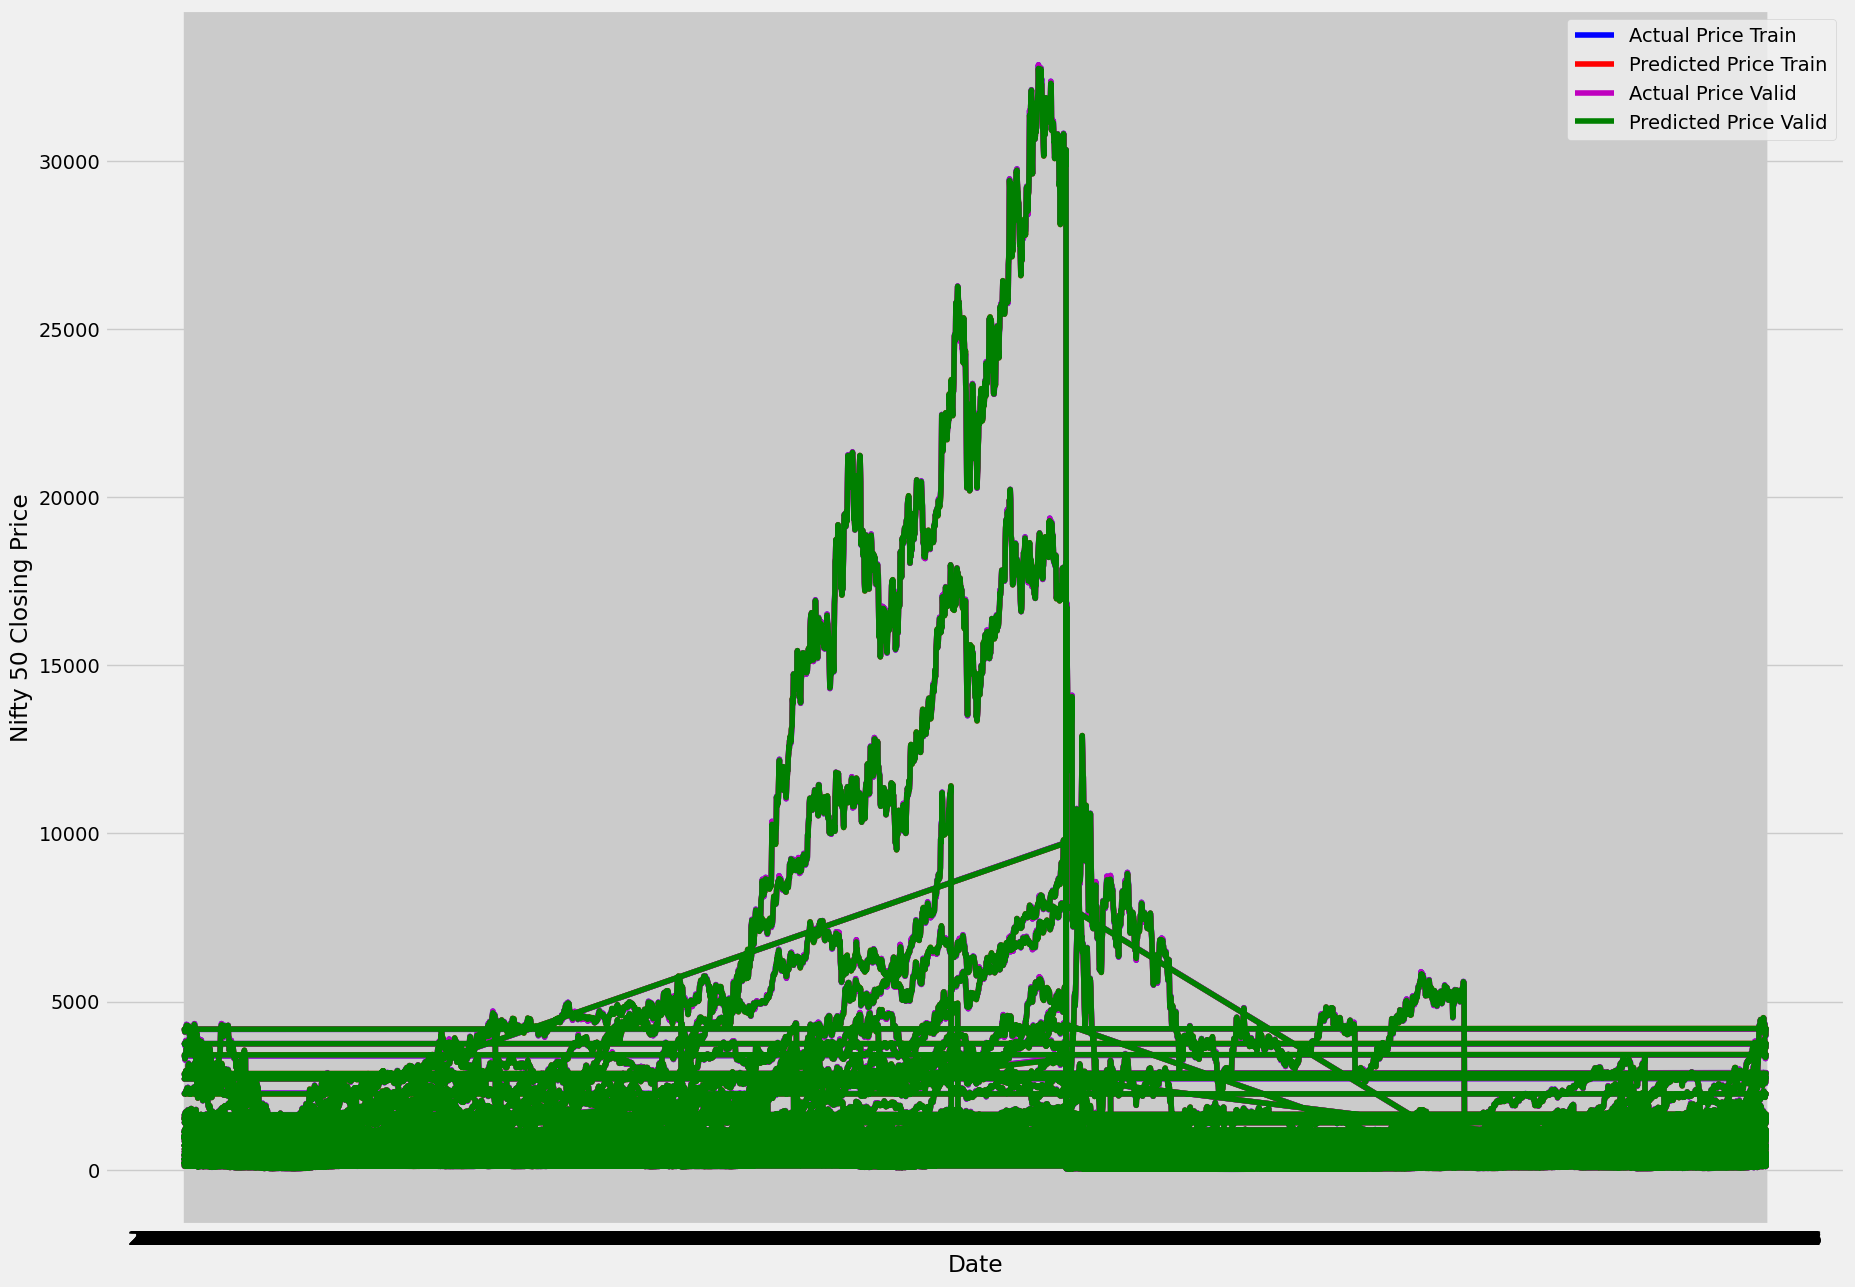

In [164]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="Actual Price Train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="Predicted Price Train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="Actual Price Valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="Predicted Price Valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()